# Προχωρημένες Υπολογιστικές Μέθοδοι Ι
## Homework 1 - Jacobi Method
### Synetos Giorgos - Aravanis Dimitris

In [1]:
#-------------------------------
#Import Library & Settings
#-------------------------------
import numpy as np
#from IPython.core.display import display, HTML
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# Poisson equation

$ \bigtriangledown ^2  \Phi =4 $

subject to B.C:  $ Φ(x,y) = x^2 + y^2 $



### Grid Definition
For the present demonstration  we are considering a grid of 5x5. 

However the grid can be adjsuted.

In [2]:
#-------------------------------
#Set the Grid
#-------------------------------

L, H = 1, 1 #Length,Height
IM, JM = 5, 5 #Number of columns & rows
Dx, Dy = L/(IM-1) , H/(JM-1)
a = Dx/Dy 
f = 4 # Η τιμή απο τη εξίσωση Poison που καλούμαστε να λύσουμε

# Set array size and set the interior value with v_init
v_init = 0 #initial guess for interior nodes
v = np.empty((JM, IM))
v_new = np.empty((JM, IM))
A= np.empty((JM, IM))

b = np.empty(IM*JM)
b.fill(f)
v.fill(v_init)

### Analytical Solution {u}

In [3]:
u = np.empty((JM, IM))
for i in range(JM):
    for j in range(IM):
        u[i, j] = (j*Dx)**2 + (i*Dy)**2
uk = u.flatten()

### Boundary Conditions

In [4]:
#-------------------------------
#Set Boundary conditions
#-------------------------------

#Top Boundary
bc_top = np.empty(IM)
for i in range(IM):
    bc_top[i] = (i*Dx)**2 + ((JM-1)*Dy)**2
v[(JM-1):, :] = bc_top

  
#Bottom Boundary
bc_bottom = np.empty(IM)
for i in range(IM):
    bc_bottom[i] = (i*Dx)**2
v[:1, :] = bc_bottom


#Right Boundary
bc_right = np.empty(JM)
for i in range(JM):
    bc_right[i] = (i*Dy)**2 + ((IM-1)*Dx)**2
bc_right = bc_right[np.newaxis, :].T
v[:, (IM-1):] = bc_right

#Left Boundary
bc_left = np.empty(JM)
for i in range(0, JM):
    bc_left[i] = (i*Dy)**2
bc_left = bc_left[np.newaxis, :].T
v[:, :1] = bc_left 

vk = v.flatten()

### Boundary Nodes

In [5]:
BN = list()

#Nodes located on Bottom
for k in range (IM):
    BN.append(k)
#Nodes located on Top
for k in range ((IM*(JM-1)),IM*JM):
    BN.append(k)
#Nodes located on the Left Side excluding first and last node
for i in range (1,JM-1):
    k = i*(IM)
    BN.append(k)
#Nodes located on the Right Side excluding first and last node
for i in range (1,JM-1):
    k = (i+1)*IM-1
    BN.append(k)
BN = sorted(BN)

### Matrix A

In [6]:
dim = (IM*JM,IM*JM)
A = np.zeros(dim)

#Boundary Nodes A[i,i]=1
for index in BN:
    A[index,index] = 1

    
#Inner Nodes
for k in range (IM*JM):
    if k not in BN:
        A[k,k]= -2*(Dx**2+Dy**2)/((Dx**2) * (Dy**2))
        vertical_neighbours = [k+IM,k-IM]
        for v_neighbour in vertical_neighbours:
            A[k,v_neighbour]= Dx**2/((Dx**2) * (Dy**2))
        horizontal_neighbours = [k+1,k-1]
        for h_neighbour in horizontal_neighbours:
            A[k,h_neighbour]= Dy**2/((Dx**2) * (Dy**2))

### Vector b


In [7]:
b=vk
for k in range (IM*JM):
    if k not in BN:
        b[k]=4

### Jacobi Method

In [8]:
#-------------------------------
#Jacobi Method
#-------------------------------

v_new[:] = v
counter= list()
residual = list()
e = list()
error = list()
res=1
iteration = 0
while res > 10**-6 and iteration in range(0, 100000) :
    v[:]=v_new
    for i in range(1, JM-1):
        for j in range(1, IM-1):
            k= i*IM + j
            v_new[i, j] = ((A[k][k+IM]*v[i+1][j] + A[k][k-IM]*v[i-1][j] + (A[k][k+1]*v[i][j+1] + A[k][k-1]*v[i][j-1]))-b[k])/-A[k][k]
            #v_new[i, j] = (Dx**2*(v[i+1][j] + v[i-1][j]) + Dy**2*(v[i][j+1] + v[i][j-1])-(b[k]*(Dx**2)*(Dy**2)))/(2*(Dx**2+Dy**2))
    
    v_newk = v_new.flatten()
    r = b-np.dot(A,v_newk)
    res = np.linalg.norm(r)
    
    #Error
    e = (uk - v_newk)
    error.append(np.linalg.norm(e))
    
    #Convergence data
    counter.append(iteration)
    residual.append(res)
    iteration += 1

print("After",iteration," iterations,",
      "the residual on the final iteration is ",res)

After 50  iterations, the residual on the final iteration is  9.684608465e-07


## Plots

In the following figures the counter lines and the convergence are presented.

#### Counter Lines

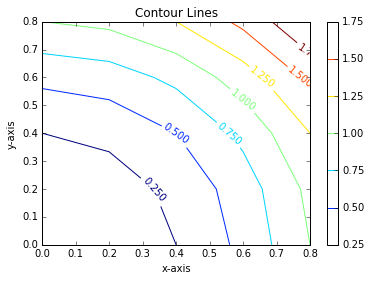

In [9]:
# Create Grid
X, Y = np.meshgrid(np.arange(0, L, L/IM), np.arange(0, H, H/JM))
# Configure the contour
cp = plt.contour(X, Y, v_new)
plt.clabel(cp, inline=True, fontsize=10)
plt.title("Contour Lines")
plt.xlabel('x-axis')
plt.ylabel('y-axis')


# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

#### Convergence Plot

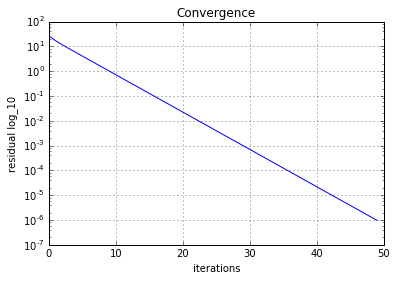

In [15]:
#plot convergence
plt.plot(counter, residual)
plt.yscale('symlog')
plt.title('Convergence')
plt.xlabel('iterations')
plt.ylabel('residual log_10')
plt.grid(True)
plt.show()

### Error Plot

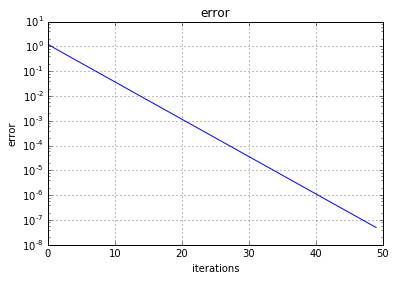

In [12]:
#plot error
plt.plot(counter, error)
plt.title('error')
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)
plt.show()